<a href="https://colab.research.google.com/github/ZiliottoFilippo/LCP_projects_Y3/blob/MiloccoRiccardo/Colab_Prel_Proj11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#Importing the required libraries.
import pandas as pd #for dataframes and reading csv files.
import numpy as np # for math operations(sqrt)
import matplotlib.pyplot as plt #for plotting the graphs


#make the axes white
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
        "axes.titlecolor":"w",
        #"axes.suptitle":"w"
}
plt.rcParams.update(params)

# Point 1: Data Preparation

The csv files are originated from different sources, hence
resulting in differences in the encoding and end-of-lines that have to be taken
into account in the data preparation phase. Make sure each .csv file is properly
interpreted: Difference in the encoding and end-of-lines; -cvs file properly interpreted



In [45]:
#dataframe from day_od.csv: "day origin and destination"
file_name="day_od.csv"
read_day_od=pd.read_csv(file_name,sep=",",encoding='utf-16', header=0, quoting=3, quotechar='"') #comment: explicit header=0 to replace column names;  
columns=["MONTH","DOW","ORIGIN","DESTINATION","CUST_CLASS","COD_COUNTRY","COD_PRO","PRO_CUM","FLOW"]
read_day_od.columns=columns
day_od=pd.DataFrame(read_day_od)#dataFrame of the file(can be read more easily than csv)

day_od[ ["COD_COUNTRY","COD_PRO","PRO_CUM"] ]=day_od[ ["COD_COUNTRY","COD_PRO","PRO_CUM"] ].astype("Int64") #Int64 handles NaN
day_od

,MONTH,DOW,ORIGIN,DESTINATION,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_CUM,FLOW
0,Marzo,Domenica,108,300,visitor,222,28,-999,493
1,Maggio,Lunedì,300,101,visitor,222,93,-999,58
2,Febbraio,Sabato,108,207,visitor,222,28,-999,39
3,Aprile,Venerdì,109,121,resident,222,28,28060,106
4,Maggio,Giovedì,300,120,visitor,222,28,28103,136
...,...,...,...,...,...,...,...,...,...
193496,Febbraio,Martedì,205,120,Altro,-999,-999,-999,32
193497,Marzo,Giovedì,214,115,Altro,-999,-999,-999,32
193498,Febbraio,Giovedì,124,121,Altro,-999,-999,-999,40
193499,Aprile,Domenica,110,300,visitor,222,28,28086,36


### Challenge accepted? 
So, convert into datetime the months to check the flow per day within a month  and groupby them for month and day. Then, keeping the month ordering (not also day) try to sort by sum of flows per day

In [46]:
  #Here's the challenge!

day_od1=day_od.replace([ "Febbraio", "Marzo","Aprile","Maggio","Lunedì","Martedì","Mercoledì","Giovedì", "Venerdì", "Sabato","Domenica"],
                      ["Feb","Mar","Apr","May","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
day_od1["MONTH"]=pd.to_datetime(day_od1["MONTH"], format="%b").dt.month
day_od1.groupby(["MONTH","DOW"], as_index=False).sum()#.sort_values("FLOW")

day_od1[ ["COD_COUNTRY","COD_PRO","PRO_CUM"] ]=day_od[ ["COD_COUNTRY","COD_PRO","PRO_CUM"] ].astype("Int64") #Int64 handles NaN


In [47]:
#Read distinct_users_day.csv
file_name="distinct_users_day.csv"
read_users_day=pd.read_csv(file_name,sep=",",encoding="latin-1")
dist_users_day=pd.DataFrame(read_users_day)

dist_users_day[ ["COD_COUNTRY","COD_PRO","PRO_COM"] ]=dist_users_day[ ["COD_COUNTRY","COD_PRO","PRO_COM"] ].astype("Int64") #Int64 handles NaN

#sorting...
#dist_users_day[dist_users_day["CUST_CLASS"]=="foreigner"].groupby("COD_COUNTRY", as_index=False).sum().sort_values("VISITORS", ascending=False)
dist_users_day[dist_users_day["CUST_CLASS"]=="visitor"].groupby("COD_PRO", as_index=False).sum().sort_values("VISITORS", ascending=False)

,COD_PRO,COD_COUNTRY,PRO_COM,VISITORS
27,28,142746,18038316,1932696
26,27,67044,8160771,620236
23,24,148962,16145112,431952
25,26,135420,15889144,317224
22,23,125652,13046327,181604
...,...,...,...,...
100,102,2220,1020338,428
99,101,1554,707070,368
90,91,888,364136,136
85,86,444,172018,64


In [48]:

# Getting DataFrame for codici_istat_comune.csv
file_name="codici_istat_comune.csv"
data_cic=pd.read_csv(file_name,sep=",",delimiter=',',header=0,quoting=3,escapechar="\"",encoding="latin-1")
codist_com=pd.DataFrame(data_cic)
codist_com[codist_com["COD_PRO"]==29]
codist_com.head()

,COD_PRO,PRO_COM,COMUNE,COMUNE_CAPOLUOGO
0,1,1001,Agliè,0
1,1,1002,Airasca,0
2,1,1003,Ala di Stura,0
3,1,1004,Albiano d'Ivrea,0
4,1,1005,Alice Superiore,0


In [49]:
# Getting DataFrame for codici_istat_provincia.csv
file_name="codici_istat_provincia.csv"
data_cip=pd.read_csv(file_name,sep=",",header=0,quoting=3,escapechar="\"",encoding="latin-1")
codist_prov=pd.DataFrame(data_cip)
codist_prov.head(20)

,COD_REG,COD_PRO,PROVINCIA,PROV_SIGLA
0,1,1,Torino,TO
1,1,2,Vercelli,VC
2,1,3,Novara,NO
3,1,4,Cuneo,CN
4,1,5,Asti,AT
5,1,6,Alessandria,AL
6,1,96,Biella,BI
7,1,103,Verbano-Cusio-Ossola,VB
8,2,7,Valle d'Aosta/Vallée d'Aoste,AO
9,3,12,Varese,VA


###Warning: mancano tre provincie

codist_prov.sum() e poi [wiki](https://it.wikipedia.org/wiki/Regioni_d%27Italia)

In [50]:
# Getting DataFrame for codici_nazioni.csv
import csv
file_name="codici_nazioni.csv"
data_cin=pd.read_csv(file_name,delimiter=',',header=0,quoting=2, #quoting=2 "Non-Numerical value ex. "Colombia";
                                error_bad_lines=True,encoding="utf-16",quotechar = '"',escapechar='\r')
codist_naz=pd.DataFrame(data_cin)

data_cin[ ["COD_COUNTRY"] ]=data_cin[ ["COD_COUNTRY"] ].astype("Int64") #Int64 handles NaN

codist_naz[108:112]

,COD_COUNTRY,COUNTRY_NAME_IT
108,658,"Isola di Sant'Elena, Ascension e Tristan de Cugna"
109,732,Colombia
110,740,Ecuador
111,746,Suriname


In [51]:
#Getting DataFrame for veneto.txt
file_name="Veneto.txt"
data_veneto=pd.read_csv(file_name,delimiter=';',decimal=",",header=0,quoting=2,quotechar = '"',encoding="utf8",error_bad_lines=False)
codist_ven=pd.DataFrame(data_veneto)

codist_ven.head()
len(codist_ven)

b'Skipping line 41944: expected 5 fields, saw 6\nSkipping line 62915: expected 5 fields, saw 7\nSkipping line 125831: expected 5 fields, saw 6\n'
b'Skipping line 146802: expected 5 fields, saw 7\nSkipping line 188745: expected 5 fields, saw 7\n'
b'Skipping line 272631: expected 5 fields, saw 7\nSkipping line 293602: expected 5 fields, saw 6\nSkipping line 335498: expected 5 fields, saw 8\n'
b'Skipping line 419383: expected 5 fields, saw 8\nSkipping line 481175: expected 5 fields, saw 9\n'
b'Skipping line 543231: expected 5 fields, saw 6\nSkipping line 604641: expected 5 fields, saw 7\nSkipping line 625029: expected 5 fields, saw 7\n'
b'Skipping line 665854: expected 5 fields, saw 6\nSkipping line 686687: expected 5 fields, saw 7\n'
b'Skipping line 788948: expected 5 fields, saw 6\nSkipping line 809919: expected 5 fields, saw 6\nSkipping line 871223: expected 5 fields, saw 9\n'
b'Skipping line 933240: expected 5 fields, saw 6\nSkipping line 953502: expected 5 fields, saw 7\nSkipping lin

4179938

codist_ven["Destinazione"]=codist_ven["Destinazione" ].str.replace(",",".")
idx=codist_ven[codist_ven["Destinazione"]=="23053.8052.00"].index[0] #209709
codist_ven=codist_ven.drop(idx, axis=0)
idx=codist_ven[codist_ven["Destinazione"]=="29006..89"].index[0] #209709
codist_ven=codist_ven.drop(idx, axis=0)
codist_ven["Destinazione"]=codist_ven["Destinazione"].astype("float")

#Point 2: Rank foreigner visitors

## Ranking of visitors from foreign countries

based on the number of total of visitors per each country, create a ranked plot of the first 20 countries with
the most visitors

In [52]:
# read COD_COUNTRY for foreigner, then sum whole visitors
mask=dist_users_day["CUST_CLASS"].str.contains('foreigner')
dist_users_day_1=dist_users_day[mask]
dist_users_day_1=dist_users_day_1.groupby(["COD_COUNTRY"],as_index=False)['VISITORS'].sum()
ranked_20=dist_users_day_1.sort_values( "VISITORS",ascending=False, ignore_index=True).nlargest(20, "VISITORS")
ranked_20.head()

,COD_COUNTRY,VISITORS
0,208,129672
1,228,116884
2,262,109176
3,460,107796
4,232,96776


In [53]:
# Ranked Countries
cod_coun_ranked_20=["Francia","Svizzera","Germania","Cina","Austria","Spagna","Paesi Bassi",
"Stati Uniti d'America","Romania","Gran Bretagna","Russia","Ungheria","Croazia","Slovenia",
"Belgio","Bulgaria","Polonia","Giappone","Repubblica Ceca","Messico"]
#storing visitor and country names

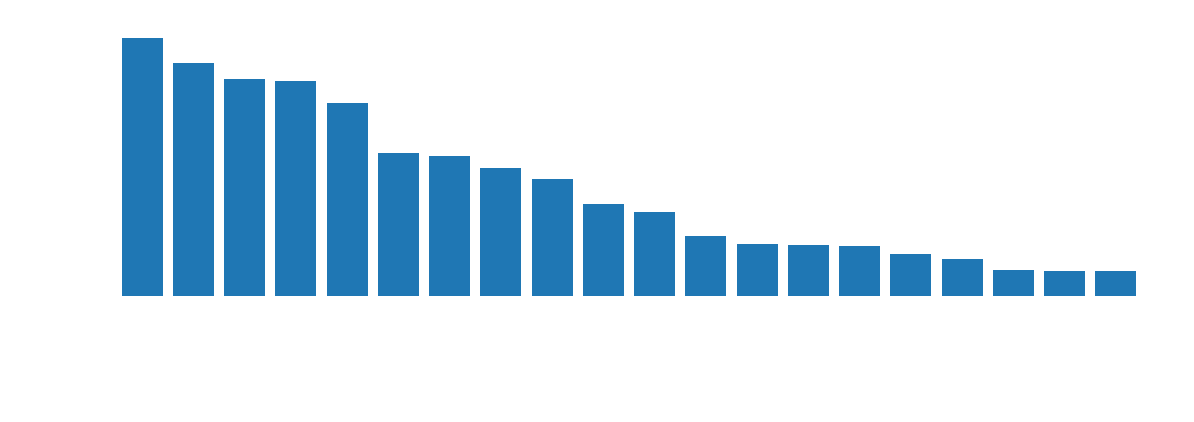

In [54]:
#plotting
plt.bar(cod_coun_ranked_20,ranked_20["VISITORS"])
plt.xticks(rotation='60') # vertical label alignment
plt.rcParams['figure.figsize'] = [20, 5] # 8 by 6 inches
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of Visitors', fontsize=15)
plt.title('Ranking of visitors from foreign countries',fontsize=15)
plt.show()

#Point 3: Rank Italian visitors

##Ranking of Italian visitors by province weighted by the number of inhabitants

Based on the number of total visitors per Italian province, create a ranked plot of the first 20 provinces with the most visitors taking into account the number of inhabitants.

In [55]:
# Assignment 3

# read COD_PRO(province codes) for Italian visitors, then sum whole visitors
mask=dist_users_day["CUST_CLASS"].str.contains('visitor')
dist_users_day_2=dist_users_day[mask].groupby(['COD_PRO'],as_index=False)['VISITORS'].sum()
sorted_dist_users_day_2=dist_users_day_2.sort_values( "VISITORS",ascending=False,ignore_index=True).head(n=20) # sorting as before
sorted_dist_users_day_2.head(7)

,COD_PRO,VISITORS
0,28,1932696
1,27,620236
2,24,431952
3,26,317224
4,23,181604
5,15,177380
6,29,163464


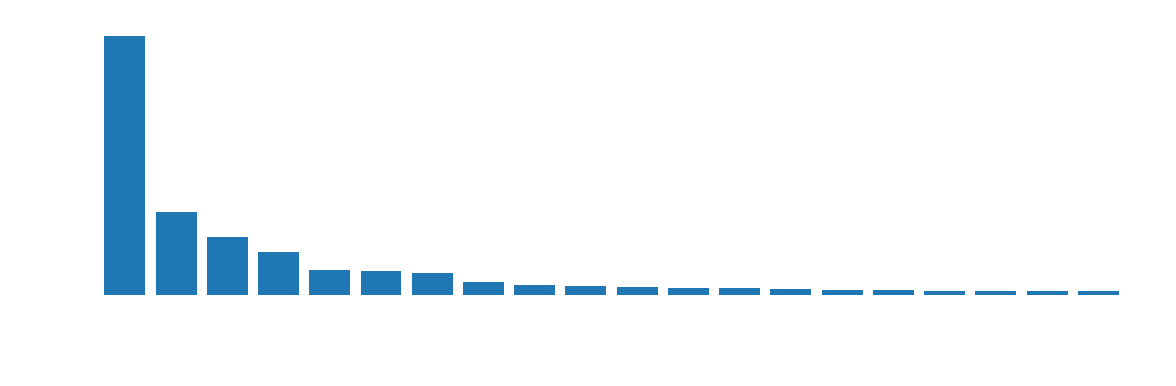

In [58]:
cod_pro_dist_users_day_2=["PADOVA","VENEZIA","VICENZA","TREVISO","VERONA","MILANO","ROVIGO","ROMA","BOLOGNA","TRENTO","FERRARA","UDINE","BELLUNO","TORINO","PORDENONE","BRESCIA","MODENA","MB","MANTOVA","BOLZANO"]

#plotting
plt.rcParams['figure.figsize'] = [20, 5] #10 by 5 inches
plt.bar(cod_pro_dist_users_day_2,sorted_dist_users_day_2["VISITORS"]);
plt.xticks(rotation='60');
plt.xlabel('Countries', fontsize=12);
plt.ylabel('Number of Visitors', fontsize=12);
plt.title('Ranking of Italian visitors by province per day',fontsize=12);

#Point 4: Study of the visitors' fluxes

Let's assume to be asked to provide indications of
how to invest resources to improve the mobility toward Padova. Defined the
three main directions of visitors and commuter getting to Padova by the Italian
highways (sud: A13 toward Bologna-Roma / west: A4 toward Milano-Torino /
north-east: A4 toward Venice-Trieste), evaluate which of the three directions
has to be prioritized:


##Mid-range mobility
Based on the number of visitors/commuters from the nearby regions only
Nearby Regions: Lombardia, Emilia Romagna, Friuli Venezia Giulia

## mancano province 5, 9,...

In [59]:
#the 1st pedant way:
commuters_flow=day_od[day_od["CUST_CLASS"]=='visitor'].groupby(["COD_PRO"],as_index=True).sum() # selected visitor and sum over flow

#sud
rovigo_commuters=commuters_flow.iloc[[27]] # 27th row of dataframe is Rovigo
ferrera_commuters=commuters_flow.iloc[[36]] # 36th row of dataframe is Ferrara
bologna_commuters=commuters_flow.iloc[[35]] # 35th row of dataframe is Bologna
rome_commuters=commuters_flow.iloc[[54]] # 54st row of dataframe is Rome
#west
vicenza_commuters=commuters_flow.iloc[[22]] # 22nd row of dataframe is Vicenza
verona_commuters=commuters_flow.iloc[[21]] # 21st row of dataframe is Verona
brescia_commuters=commuters_flow.iloc[[15]] # 15th row of dataframe is Brescia
bergamo_commuters=commuters_flow.iloc[[14]] # 14th row of dataframe is Bergamo
torino_commuters=commuters_flow.iloc[[1]] # 1st row of dataframe is Torino
milano_commuters=commuters_flow.iloc[[13]] # 13th row of dataframe is Milano
#east
treviso_commuters=commuters_flow.iloc[[24]] # 24th row of dataframe is Treviso
venezia_commuters=commuters_flow.iloc[[25]] # 25th row of dataframe is Venice
trieste_commuters=commuters_flow.iloc[[30]] # 30th row of dataframe is Trieste

a4_highway_milan_torino_commuters = (vicenza_commuters.FLOW.iloc[0]) + (verona_commuters.FLOW.iloc[0]) + (brescia_commuters.FLOW.iloc[0])  
a4_highway_venice_trieste_commuters = (venezia_commuters.FLOW.iloc[0]) + (treviso_commuters.FLOW.iloc[0])
a13_highway_bologna_rome_commuters = (bologna_commuters.FLOW.iloc[0]) + (ferrera_commuters.FLOW.iloc[0]) + (rovigo_commuters.FLOW.iloc[0])

highways_commuters=[a4_highway_milan_torino_commuters,a4_highway_venice_trieste_commuters,a13_highway_bologna_rome_commuters]
highway_names=["A4-West","A4-East","A13-Sud"]

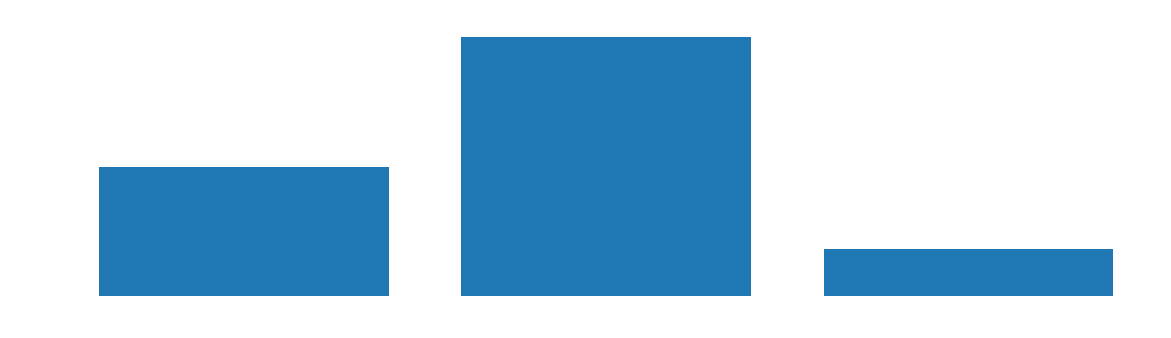

In [60]:

plt.bar(highway_names,highways_commuters);
plt.xlabel('Highways', fontsize=14);
plt.ylabel('Flow', fontsize=14);
plt.title('Highway Flows of Padova',fontsize=14);

In [ ]:
#2nd more clever:

commuters=day_od[day_od["CUST_CLASS"]=='visitor'].groupby(["COD_PRO"],as_index=True).sum()#.sort_values("FLOW", ascending=True)
# Select Visitor(commuters) only + sorted by COD_PRO and FLOWs summed

#drop province -999
#idx1=commuters[commuters.index==-999].index[0]
#commuters.drop(idx1, inplace=True)


commuters.loc[[29]] #better to format in this way

## Part 4.2: weekend visits VS working visits
Consider the provinces located on the three directions that are mostly contributing to the flow of weekend visitors and working daily commuters by performing a more detailed study of the fluxes based on the day of the week

In [ ]:
#4.2
df_flux_2=day_od[day_od.CUST_CLASS.str.contains(' '.join(['visitor']))]
# getting values of all cities on the south-west-east
week=df_flux_2[(df_flux_2['COD_PRO'] == 27)|
                  (df_flux_2['COD_PRO'] == 32)|
                  (df_flux_2['COD_PRO'] == 37)|
                  (df_flux_2['COD_PRO'] == 58)|
                  (df_flux_2['COD_PRO'] == 15)|
                  (df_flux_2['COD_PRO'] == 29)|
                  (df_flux_2['COD_PRO'] == 38)|
                  (df_flux_2['COD_PRO'] == 48)|
                  (df_flux_2['COD_PRO'] == 24)|
                  (df_flux_2['COD_PRO'] == 23)|
                  (df_flux_2['COD_PRO'] == 17)|
                  (df_flux_2['COD_PRO'] == 16)|
                  (df_flux_2['COD_PRO'] == 26)|
                  (df_flux_2['COD_PRO'] == 1)]

highway_namess=["A4-Milan-Torino","A4-Venice-Trieste","A13-Bologna-Rome"]

#week.groupby("COD_PRO").sum()

#sorted provinces grouped by days
week_sorted=week.groupby(["DOW","COD_PRO"],as_index=False)['FLOW'].sum()

#weekday VS weekend------------------------------------------------------
weekend=week_sorted[(week_sorted["DOW"]=="Sabato") |
                    (week_sorted["DOW"]=="Domenica") ]

weekday=week_sorted[(week_sorted["DOW"]!="Sabato") |
                    (week_sorted["DOW"]!="Domenica") ]

weekend=weekend.groupby(["COD_PRO"],as_index=False)["FLOW"].sum()
weekday=weekday.groupby(["COD_PRO"],as_index=False)["FLOW"].sum()

weekday

In [ ]:
day_monday=week_sorted[(week_sorted["DOW"]=="Lunedì")]
day_tuesday=week_sorted[(week_sorted["DOW"]=="Martedì")]
day_wednesday=week_sorted[(week_sorted["DOW"]=="Mercoledì")]
day_thursday=week_sorted[(week_sorted["DOW"]=="Giovedì")]
day_friday=week_sorted[(week_sorted["DOW"]=="Venerdì")]
day_saturday=week_sorted[(week_sorted["DOW"]=="Sabato")]
day_sunday=week_sorted[(week_sorted["DOW"]=="Domenica")]


# weekday and weekend for 3 directions
a4_west_weekday=weekday.FLOW.iloc[:5].sum() # first 5 entries corresponds to a4_west
a4_west_weekend=weekend.FLOW.iloc[:5].sum()

a4_east_weekday=weekday.FLOW.iloc[[6,7,9]].sum()# 6th, 7th, 9th entries corresponds to a4_east
a4_east_weekend=weekend.FLOW.iloc[[6,7,9]].sum()

a13_weekday=weekday.FLOW.iloc[[8,10,11,12,13]].sum() # 8th, 10th, 11th, 12th, 13th entries corresponds to a13
a13_weekend=weekend.FLOW.iloc[[8,10,11,12,13]].sum()

#this is for the final plot required
weekend_highways=[a4_west_weekend,a4_east_weekend,a13_weekend]
weekday_highways=[a4_west_weekday,a4_east_weekday,a13_weekday]

# plotting phase

plt.rcParams['figure.figsize'] = [16, 4] # 14 by 4 inches

fig, (ax1, ax2) = plt.subplots(1,2);

fig.suptitle('Weekday and Weekend');
ax1.set_title("Weekday")
ax1.set_ylabel('Visitors')
ax2.set_ylabel('Visitors')
ax2.set_title("Weekend")


ax1.bar(highway_namess, weekday_highways);
ax2.bar(highway_namess, weekend_highways);

## MISCELLANEA: day by day for 3 directions


In [ ]:
days_of_week=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

#a4_west
a4_west_monday=day_monday.FLOW.iloc[:5].sum()
a4_west_tuesday=day_tuesday.FLOW.iloc[:5].sum()
a4_west_wednesday=day_wednesday.FLOW.iloc[:5].sum()
a4_west_thursday=day_thursday.FLOW.iloc[:5].sum()
a4_west_friday=day_friday.FLOW.iloc[:5].sum()
a4_west_saturday=day_saturday.FLOW.iloc[:5].sum()
a4_west_sunday=day_sunday.FLOW.iloc[:5].sum()

#a4_east
a4_east_monday=day_monday.FLOW.iloc[[6,7,9]].sum()
a4_east_tuesday=day_tuesday.FLOW.iloc[[6,7,9]].sum()
a4_east_wednesday=day_wednesday.FLOW.iloc[[6,7,9]].sum()
a4_east_thursday=day_thursday.FLOW.iloc[[6,7,9]].sum()
a4_east_friday=day_friday.FLOW.iloc[[6,7,9]].sum()
a4_east_saturday=day_saturday.FLOW.iloc[[6,7,9]].sum()
a4_east_sunday=day_sunday.FLOW.iloc[[6,7,9]].sum()

#a13_south
a13_monday=day_monday.FLOW.iloc[[8,10,11,12,13]].sum()
a13_tuesday=day_tuesday.FLOW.iloc[[8,10,11,12,13]].sum()
a13_wednesday=day_wednesday.FLOW.iloc[[8,10,11,12,13]].sum()
a13_thursday=day_thursday.FLOW.iloc[[8,10,11,12,13]].sum()
a13_friday=day_friday.FLOW.iloc[[8,10,11,12,13]].sum()
a13_saturday=day_saturday.FLOW.iloc[[8,10,11,12,13]].sum()
a13_sunday=day_sunday.FLOW.iloc[[8,10,11,12,13]].sum()

#all togheter now
a4_west_days=[a4_west_monday,a4_west_tuesday,a4_west_wednesday,a4_west_thursday,a4_west_friday,a4_west_saturday,a4_west_sunday]
a4_east_days=[a4_east_monday,a4_east_tuesday,a4_east_wednesday,a4_east_thursday,a4_east_friday,a4_east_saturday,a4_east_sunday]
a13_days=[a13_monday,a13_tuesday,a13_wednesday,a13_thursday,a13_friday,a13_saturday,a13_sunday]

highways_monday=[a4_west_monday,a4_east_monday,a13_monday]
highways_tuesday=[a4_west_tuesday,a4_east_tuesday,a13_tuesday]
highways_wednesday=[a4_west_wednesday,a4_east_wednesday,a13_wednesday]
highways_thursday=[a4_west_thursday,a4_east_thursday,a13_thursday]
highways_friday=[a4_west_friday,a4_east_friday,a13_friday]

fig, ax1= plt.subplots();

fig.suptitle('Day by day');
ax1.set_xlabel('Visitors')
ax1.set_ylabel('Visitors')

ax1.bar(days_of_week, a4_west_days);